In [2]:
import pandas as pd
import seaborn.objects as so
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df_train = pd.read_csv("./../data/train.csv")
df_test_nolabel = pd.read_csv("./../data/test_nolabel.csv")
df_sample_submission = pd.read_csv("./../data/sample_submission.csv")

In [4]:
df_sample_submission

,id,Accept
0,82e99051e9c,1
1,df1cfad8fb6,1
2,2d3d3198980,0
3,3f56f41d280,1
4,cca77d2e8a4,1
...,...,...
3269,19ecb5cd698,0
3270,d1ac6d902de,1
3271,e8c19edd044,1
3272,7139f39bee2,0


In [5]:
df_test_nolabel

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross
0,82e99051e9c,7802533009,"CAROL A. SCHRECKENGAUST, C.P.A",HARRISBURG,PA,MANUFACTURERS & TRADERS TR CO,NY,16-Nov-94,1995,3,1.0,0,0,1,0,N,Y,31-Jan-95,"$80,000.00",$0.00
1,df1cfad8fb6,3236685007,Rigby Starr's Tanning,Center Township,PA,THE HUNTINGTON NATIONAL BANK,OH,8-Oct-08,2009,0,1.0,0,0,0,1,N,N,30-Nov-08,"$24,006.00",$0.00
2,2d3d3198980,7117124002,MEADOW LANE II,PHILADELPHIA,PA,"PNC BANK, NATIONAL ASSOCIATION",DE,22-Jan-04,2004,2,2.0,2,2,1,1,Y,N,31-Mar-04,"$20,000.00",$0.00
3,3f56f41d280,6793344010,A1 EXPRESS TRANSPORTATION COMP,PENNDEL,PA,CAPITAL ONE NATL ASSOC,VA,15-Oct-03,2004,21,1.0,5,21,1,2,0,N,30-Nov-03,"$50,000.00",$0.00
4,cca77d2e8a4,2550945006,"NANJB, Inc.",Broomall,PA,MANUFACTURERS & TRADERS TR CO,NY,3-Jul-07,2007,4,2.0,0,4,0,1,N,N,31-Jul-07,"$58,107.00",$0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,19ecb5cd698,2630575002,Feathered Gems Photography,Youngsville,PA,"PNC BANK, NATIONAL ASSOCIATION",DE,10-Aug-07,2007,1,2.0,0,1,0,1,Y,N,31-Aug-07,"$16,358.00",$0.00
3270,d1ac6d902de,5972694000,ALLEGHENY SITE ASSESSMENT CORP,PITTSBURGH,PA,CITIZENS BANK NATL ASSOC,RI,24-Dec-02,2003,1,1.0,0,1,1,1,T,N,31-Jul-05,"$25,000.00",$0.00
3271,e8c19edd044,5958454002,CANNON FINANCIAL RESOURCES LLC,CONNEAUT LAKE,PA,"PNC BANK, NATIONAL ASSOCIATION",DE,18-Dec-02,2003,5,1.0,1,5,1,2,Y,N,31-Jan-03,"$16,738.00",$0.00
3272,7139f39bee2,9510673002,STRIP BREWERY & ALE HOUSE,PITTSBURGH,PA,"READYCAP LENDING, LLC",CA,4-Sep-96,1996,22,2.0,0,0,1,0,0,N,31-Jul-97,"$515,000.00",$0.00


In [6]:
df_train

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,2fa57387ae1,6213754009,SETANTA SETTERS,PITTSBURGH,PA,CITIZENS BANK NATL ASSOC,MA,1-Apr-03,2003,1,...,1,2,1,1,Y,N,30-Jun-03,"$5,440.00",$0.00,1
1,a66f9849d7f,1751224008,DURACLEAN BY SEITZER,MONTOURSVILLE,PA,MANUFACTURERS & TRADERS TR CO,NY,19-Dec-97,1998,20,...,0,0,25850,0,N,Y,28-Feb-98,"$33,800.00",$0.00,1
2,fb6a6d89487,6979444003,PC HAINES WALL & CEILING CONTR,SALUNGA,PA,CITIZENS BANK NATL ASSOC,RI,1-Dec-03,2004,9,...,0,9,1,2,Y,N,29-Feb-04,"$156,599.00",$0.00,1
3,0ac44b54067,5825754005,LESLIE A LANDIS,YORK,PA,MANUFACTURERS & TRADERS TR CO,MD,31-Oct-02,2003,3,...,2,5,1,1,0,N,31-Jan-03,"$40,000.00",$0.00,1
4,3a5ff625fa3,8989333001,"MAILBOXES, ETC.",PHILADELPHIA,PA,NEWTEK SMALL BUS. FINANCE INC.,NY,7-Feb-96,1996,3,...,0,0,50564,0,N,Y,31-Oct-96,"$100,000.00",$0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24614,ae972125b13,7387374007,HUNTINGDON CREAMERY,HUNTINGDON,PA,KISH BANK,PA,27-Apr-04,2004,2,...,2,0,1,1,0,N,31-May-04,"$20,000.00",$0.00,1
24615,95d6fb854b9,1175195009,MAJIK D.J. ENTERTAINMENT,FLEETWOOD,PA,CITIZENS BANK NATL ASSOC,RI,31-Jan-05,2005,2,...,0,2,1,1,N,N,30-Apr-06,"$10,000.00",$0.00,1
24616,5e446a47a0f,1797704005,MCCULLOUGH TOWING & STORAGE,PHILA,PA,SUSQUEHANNA BANK,PA,22-Jan-98,1998,3,...,0,0,1,0,N,Y,31-Mar-98,"$60,000.00",$0.00,1
24617,549dcfeb04e,3816914004,HALLS FLORIST,WILLIAMSPORT,PA,MANUFACTURERS & TRADERS TR CO,NY,29-Jun-00,2000,4,...,0,3,1,1,Y,N,31-Aug-04,"$10,000.00",$0.00,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24619 entries, 0 to 24618
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 24619 non-null  object 
 1   LoanNr_ChkDgt      24619 non-null  int64  
 2   Name               24618 non-null  object 
 3   City               24619 non-null  object 
 4   State              24619 non-null  object 
 5   Bank               24535 non-null  object 
 6   BankState          24535 non-null  object 
 7   ApprovalDate       24619 non-null  object 
 8   ApprovalFY         24619 non-null  int64  
 9   NoEmp              24619 non-null  int64  
 10  NewExist           24615 non-null  float64
 11  CreateJob          24619 non-null  int64  
 12  RetainedJob        24619 non-null  int64  
 13  FranchiseCode      24619 non-null  int64  
 14  UrbanRural         24619 non-null  int64  
 15  RevLineCr          24530 non-null  object 
 16  LowDoc             245

In [8]:
df_train.isna().sum()

id                     0
LoanNr_ChkDgt          0
Name                   1
City                   0
State                  0
Bank                  84
BankState             84
ApprovalDate           0
ApprovalFY             0
NoEmp                  0
NewExist               4
CreateJob              0
RetainedJob            0
FranchiseCode          0
UrbanRural             0
RevLineCr             89
LowDoc                45
DisbursementDate     100
DisbursementGross      0
BalanceGross           0
Accept                 0
dtype: int64

In [9]:
df_train["id"].unique()

array(['2fa57387ae1', 'a66f9849d7f', 'fb6a6d89487', ..., '5e446a47a0f',
       '549dcfeb04e', '81c5faf8439'], dtype=object)

In [10]:
df_train["LoanNr_ChkDgt"].unique()

array([6213754009, 1751224008, 6979444003, ..., 1797704005, 3816914004,
       4149724006])

In [11]:
df_train["Name"].unique()

array(['SETANTA SETTERS', 'DURACLEAN BY SEITZER',
       'PC HAINES WALL & CEILING CONTR', ...,
       'MCCULLOUGH TOWING & STORAGE', 'HALLS FLORIST',
       "INTERNT'L HARDWOOD RESOURCES"], dtype=object)

In [12]:
df_train.groupby("Name").size().sort_values(ascending=False)

Name
SUBWAY                            56
DUNKIN DONUTS                     39
REGENT FLOORS, INC.               31
HOLLYWOOD TANS                    23
FOX'S PIZZA DEN                   22
                                  ..
GILBERT SIDKOFF GRAPHICS ARTS      1
GILBERT DENTAL CENTER              1
GILBERT D MURDICK                  1
GIL'S SKI SHOP                     1
willow inn, inc. DBA WILLOW IN     1
Length: 21301, dtype: int64

In [13]:
df_train["City_Extracted"] = df_train["City"].str.lower()

In [14]:
df_train.groupby("City_Extracted").size().sort_values(ascending=False)

City_Extracted
philadelphia       2204
pittsburgh         1888
erie                700
altoona             395
harrisburg          382
                   ... 
maytown               1
mc elhattan           1
mcalister             1
mckees rocks,         1
marlborough twp       1
Length: 1907, dtype: int64

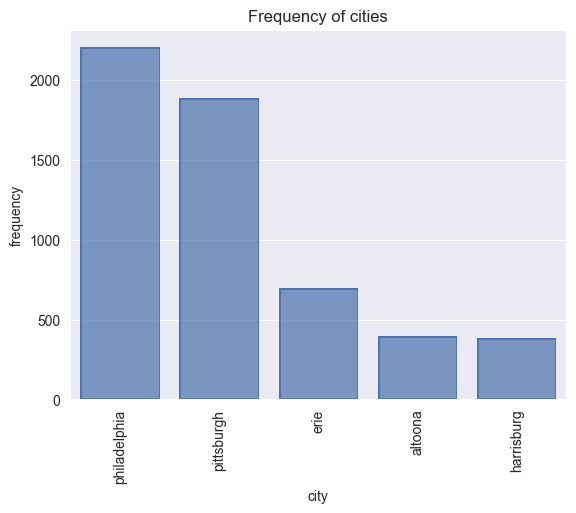

In [15]:

df_dataviz_01 = df_train.groupby("City_Extracted").size().sort_values(ascending=False).reset_index()
df_dataviz_01.columns = ["city", "frequency"]
df_dataviz_01_filtered = df_dataviz_01[df_dataviz_01["frequency"] > 300]

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_01_filtered, x="city", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of cities")\
    .layout(size=(8, 4))\
    .on(ax)\
    .plot()

In [16]:
df_train["State"].unique()

array(['PA'], dtype=object)

In [17]:
df_train.groupby("Bank").size().sort_values(ascending=False)

Bank
PNC BANK, NATIONAL ASSOCIATION    4968
CITIZENS BANK NATL ASSOC          4774
MANUFACTURERS & TRADERS TR CO     1508
WELLS FARGO BANK NATL ASSOC       1275
FIRST COMMONWEALTH BANK           1196
                                  ... 
SHARON SAVINGS BANK                  1
NEW MILLENNIUM BANK                  1
NEW WINDSOR STATE BANK               1
SANDY SPRING BANK                    1
FORT LEE FEDERAL SAVINGS BANK        1
Length: 312, dtype: int64

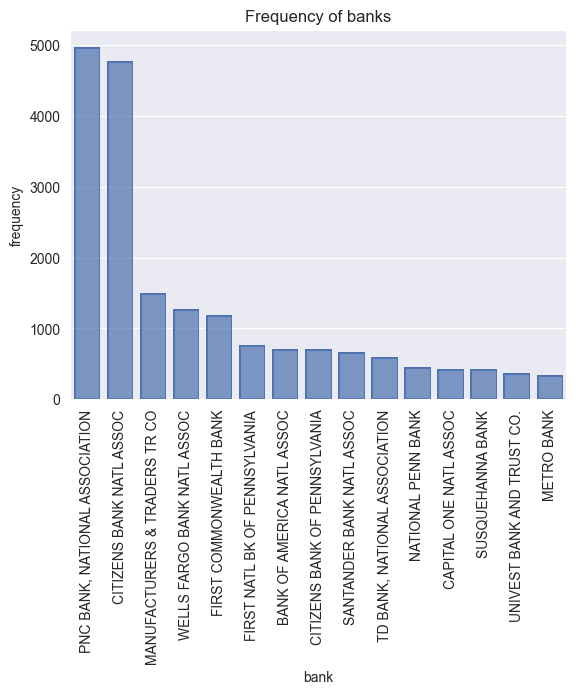

In [18]:
df_dataviz_02 = df_train.groupby("Bank").size().sort_values(ascending=False).reset_index()
df_dataviz_02.columns = ["bank", "frequency"]
df_dataviz_02_filtered = df_dataviz_02[df_dataviz_02["frequency"] > 300]

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_02_filtered, x="bank", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of banks")\
    .layout(size=(8, 4))\
    .on(ax)\
    .plot()

In [19]:
df_train.groupby("BankState").size().sort_values(ascending=False)


BankState
PA    9782
RI    4867
DE    4533
NY    1614
SD     634
NC     571
CA     531
VA     446
NJ     437
OH     211
MD     210
SC     175
TX     116
MA     107
CT     103
WV      33
KY      25
CO      25
UT      14
IL      13
IN      12
NV      11
OR      11
MN       7
DC       7
TN       6
WI       5
MI       5
MO       3
AL       3
GA       3
FL       2
IA       2
NH       2
AK       2
NM       1
NE       1
AZ       1
ND       1
AR       1
WA       1
MS       1
dtype: int64

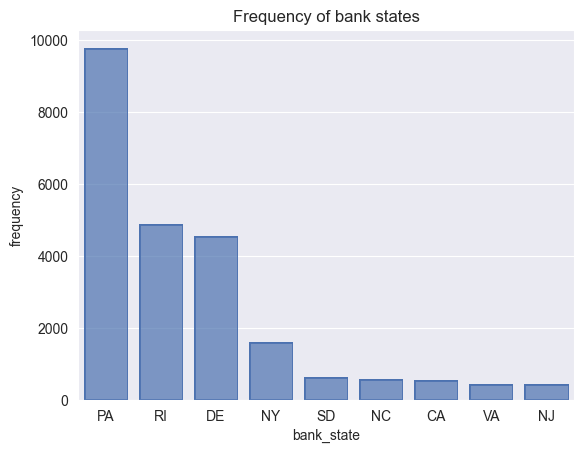

In [20]:
df_dataviz_03 = df_train.groupby("BankState").size().sort_values(ascending=False).reset_index()
df_dataviz_03.columns = ["bank_state", "frequency"]
df_dataviz_03_filtered = df_dataviz_03[df_dataviz_03["frequency"] > 300]

fig, ax = plt.subplots()
#ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_03_filtered, x="bank_state", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of bank states")\
    .layout(size=(8, 4))\
    .on(ax)\
    .plot()

In [21]:
df_train["ApprovalDate"] = pd.to_datetime(df_train["ApprovalDate"])
df_train.groupby("ApprovalDate").size().sort_values(ascending=False)

ApprovalDate
2003-03-28    48
2004-01-30    47
2002-09-27    44
2003-03-20    44
2003-02-21    40
              ..
1993-09-09     1
1993-09-07     1
1993-09-03     1
1993-09-01     1
2072-12-01     1
Length: 5158, dtype: int64

In [22]:
df_train["ApprovalDate_Year"] = df_train["ApprovalDate"].dt.year
df_train["ApprovalDate_Month"] = df_train["ApprovalDate"].dt.month

df_train.groupby(["ApprovalDate_Year", "ApprovalDate_Month"]).size().sort_index(ascending=False)

ApprovalDate_Year  ApprovalDate_Month
2072               12                    1
                   3                     1
2069               4                     1
2014               1                     1
2013               12                    1
                                        ..
1976               11                    1
                   5                     1
1975               9                     1
                   8                     1
1973               3                     1
Length: 392, dtype: int64

,year,month,frequency
0,2072,12,1
1,2072,3,1
2,2069,4,1
3,2014,1,1
4,2013,12,1
...,...,...,...
387,1976,11,1
388,1976,5,1
389,1975,9,1
390,1975,8,1


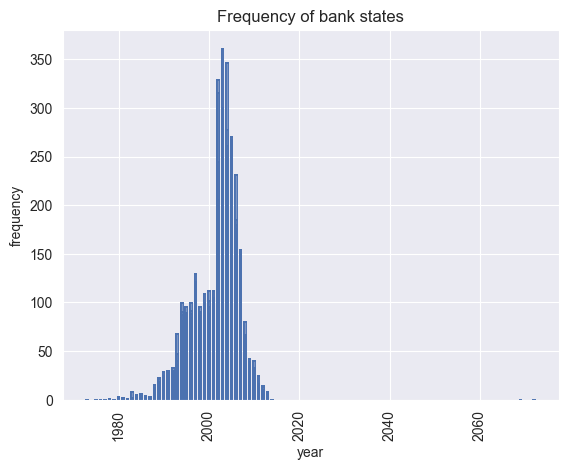

In [23]:
df_dataviz_04 = df_train.groupby(["ApprovalDate_Year", "ApprovalDate_Month"]).size().sort_index(ascending=False).reset_index()
df_dataviz_04.columns = ["year", "month", "frequency"]

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_04, x="year", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of bank states")\
    .layout(size=(8, 4))\
    .on(ax)\
    .plot()
df_dataviz_04

In [24]:
df_train.groupby("ApprovalFY").size()

ApprovalFY
1969       1
1972       1
1973       2
1976       3
1977       3
1978       4
1979       5
1980       6
1981      16
1982       7
1983      20
1984      34
1985      25
1986      26
1987      16
1988      11
1989     188
1990     220
1991     263
1992     316
1993     365
1994     551
1995    1007
1996     910
1997    1011
1998     962
1999     951
2000     983
2001    1055
2002    1900
2003    2810
2004    2743
2005    2819
2006    2004
2007    1566
2008     759
2009     346
2010     302
2011     223
2012     118
2013      63
2014       4
dtype: int64

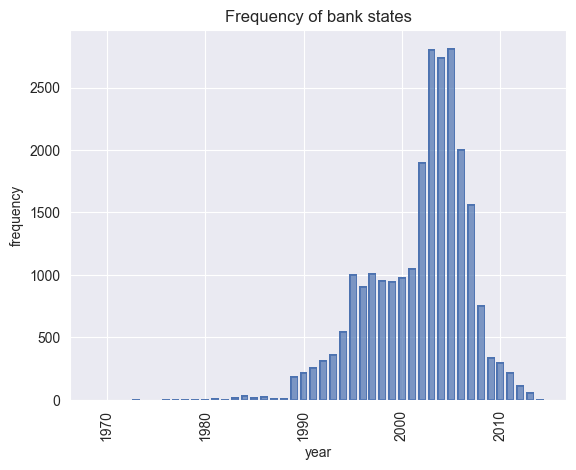

In [25]:
df_dataviz_05 = df_train.groupby("ApprovalFY").size().reset_index()
df_dataviz_05.columns = ["year", "frequency"]

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

p = so.Plot(df_dataviz_05, x="year", y="frequency")\
    .add(so.Bar())\
    .label(title="Frequency of bank states")\
    .layout(size=(12, 4))\
    .on(ax)\
    .plot()

In [26]:
df_train.groupby("NoEmp").size().sort_values(ascending=False)

NoEmp
1       5028
2       4143
3       2612
4       2016
5       1583
        ... 
166        1
169        1
175        1
180        1
9090       1
Length: 178, dtype: int64

In [27]:
df_train.groupby("NewExist").size().sort_values(ascending=False)

NewExist
1.0    17743
2.0     6737
0.0      135
dtype: int64

In [28]:
df_train.groupby("CreateJob").size()

CreateJob
0       18398
1        1599
2        1394
3         719
4         454
        ...  
225         1
250         1
320         1
2020        1
8800       11
Length: 78, dtype: int64

In [29]:
df_train.groupby("RetainedJob").size()

RetainedJob
0       9978
1       3382
2       2609
3       1647
4       1191
        ... 
275        1
300        1
400        1
500        1
8800      11
Length: 117, dtype: int64

In [30]:
df_train.groupby("FranchiseCode").size().sort_values(ascending=False)

FranchiseCode
1        18612
0         4695
78760      121
25650       77
68020       56
         ...  
52413        1
17156        1
16920        1
52865        1
92000        1
Length: 393, dtype: int64

In [31]:
df_train[["City", "UrbanRural"]][df_train["UrbanRural"] == 0]

,City,UrbanRural
1,MONTOURSVILLE,0
4,PHILADELPHIA,0
6,JOHNSTOWN,0
7,CORRY,0
9,ROBESONIA,0
...,...,...
24608,PITTSBURGH,0
24610,PHILADELPHIA,0
24611,EDINBORO,0
24612,PHILADELPHIA,0


In [32]:
df_train.groupby("UrbanRural").size().sort_values(ascending=False)


UrbanRural
1    14815
0     6677
2     3127
dtype: int64

In [33]:
df_train.groupby("RevLineCr").size().sort_values(ascending=False)

RevLineCr
N    9600
Y    7231
0    6788
T     911
dtype: int64

In [34]:
df_train.groupby("LowDoc").size().sort_values(ascending=False)

LowDoc
N    21257
Y     3253
0       42
A        7
S        6
C        5
R        4
dtype: int64

In [35]:
df_train["DisbursementDate"] = pd.to_datetime(df_train["DisbursementDate"])
df_train.groupby("DisbursementDate").size().sort_values(ascending=False)

DisbursementDate
2002-12-31    339
2003-04-30    320
2003-12-31    295
2005-06-30    290
2003-10-31    282
             ... 
1998-02-25      1
1998-01-14      1
1998-01-02      1
1997-12-17      1
2069-05-22      1
Length: 889, dtype: int64

In [36]:
df_train["DisbursementDate_Year"] = df_train["DisbursementDate"].dt.year
df_train["DisbursementDate_Month"] = df_train["ApprovalDate"].dt.month

df_train.groupby(["DisbursementDate_Year", "DisbursementDate_Month"]).size().sort_index(ascending=False)

DisbursementDate_Year  DisbursementDate_Month
2069.0                 4                         1
2014.0                 11                        2
                       1                         1
2013.0                 12                        7
                       11                        3
                                                ..
1976.0                 9                         1
                       8                         1
                       5                         1
1973.0                 12                        1
                       3                         2
Length: 396, dtype: int64

In [37]:
df_train["DisbursementGross_Extracted"] = df_train["DisbursementGross"]\
    .str.extract("(\d+(?:,\d+)*(?:\.\d+)?)")[0]\
    .str.replace(",", "")\
    .astype("float")
df_train["DisbursementGross_Extracted"]

0          5440.0
1         33800.0
2        156599.0
3         40000.0
4        100000.0
           ...   
24614     20000.0
24615     10000.0
24616     60000.0
24617     10000.0
24618    850000.0
Name: DisbursementGross_Extracted, Length: 24619, dtype: float64

In [38]:
df_train[["DisbursementGross", "DisbursementGross_Extracted"]]

,DisbursementGross,DisbursementGross_Extracted
0,"$5,440.00",5440.0
1,"$33,800.00",33800.0
2,"$156,599.00",156599.0
3,"$40,000.00",40000.0
4,"$100,000.00",100000.0
...,...,...
24614,"$20,000.00",20000.0
24615,"$10,000.00",10000.0
24616,"$60,000.00",60000.0
24617,"$10,000.00",10000.0


In [39]:
df_train["DisbursementGross_Bin"] = pd.qcut(df_train["DisbursementGross_Extracted"], 10, labels=range(10))
df_train.groupby(["DisbursementGross_Bin"]).size().sort_index(ascending=False)

DisbursementGross_Bin
9    2449
8    2429
7    2449
6    1680
5    3302
4    2178
3    2719
2    2422
1    2253
0    2738
dtype: int64

In [40]:
df_train.groupby(["BalanceGross"]).size().sort_index(ascending=False)

BalanceGross
$43,127.00          1
$395,476.00         1
$12,750.00          1
$0.00           24616
dtype: int64

In [41]:
df_train.groupby(["Accept"]).size().sort_index(ascending=False)

Accept
1    20798
0     3821
dtype: int64

https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/